In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("dataset/SaratogaHouses.csv")
dataset.drop("Unnamed", axis=1, inplace=True)

In [3]:
dataset.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [4]:
X = dataset[["livingArea", "landValue", "rooms", "centralAir"]].values
y = dataset["price"].values

In [5]:
pd.unique(dataset["centralAir"])

array(['No', 'Yes'], dtype=object)

In [6]:
X[:,-1]

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()
X[:,-1] = encoder.fit_transform(X[:,-1])

In [9]:
X[:10]

array([[906, 50000, 5, 0],
       [1953, 22300, 6, 0],
       [1944, 7300, 8, 0],
       [1944, 18700, 5, 0],
       [840, 15000, 3, 1],
       [1152, 14000, 8, 0],
       [2752, 23300, 8, 0],
       [1662, 14600, 9, 0],
       [1632, 22200, 8, 0],
       [1416, 21200, 6, 0]], dtype=object)

In [10]:
pd.unique(dataset["fuel"])

array(['electric', 'gas', 'oil'], dtype=object)

In [11]:
dataset["fuel"][:10]

0    electric
1         gas
2         gas
3         gas
4         gas
5         gas
6         oil
7         oil
8    electric
9         gas
Name: fuel, dtype: object

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
fuel = dataset["fuel"]

In [14]:
fuel = encoder.fit_transform(fuel)

In [15]:
fuel[:20]

array([0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2])

In [16]:
fuel = fuel.reshape(-1,1)
oneHotEncoder = OneHotEncoder()
fuel = oneHotEncoder.fit_transform(fuel)

In [17]:
fuel

<1728x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1728 stored elements in Compressed Sparse Row format>

In [18]:
fuel.toarray()[:10]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [19]:
X

array([[906, 50000, 5, 0],
       [1953, 22300, 6, 0],
       [1944, 7300, 8, 0],
       ...,
       [1099, 20400, 3, 0],
       [1225, 16800, 7, 0],
       [1959, 26000, 6, 0]], dtype=object)

In [20]:
# import numpy as np
# >>> x = np.array([
# 		[2,3,4],
# 		[1,2,3],
# 		[4,5,6],
# 		[2,3,1]
# 	])
# >>> 
# >>> stdFitObject = std.fit(x)
# >>> stdFitObject
# StandardScaler(copy=True, with_mean=True, with_std=True)
# >>> stdFitObject.var_
# array([1.1875, 1.1875, 3.25  ])
# >>> stdFitObject.transform(x)
# array([[-0.22941573, -0.22941573,  0.2773501 ],
#        [-1.14707867, -1.14707867, -0.2773501 ],
#        [ 1.60591014,  1.60591014,  1.38675049],
#        [-0.22941573, -0.22941573, -1.38675049]])
# >>> 

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
std = StandardScaler()
X[:,:-1] = std.fit_transform( X[:,:-1] )

In [23]:
y = y.reshape(-1,1)
y = std.fit_transform(y)

In [24]:
X,y

(array([[-1.369854414453798, 0.4410841700670096, -0.8816315549989284, 0],
        [0.31951971170615984, -0.3500949957006358, -0.4498120178565962, 0],
        [0.304997871080143, -0.7785313670549564, 0.4138270564280683, 0],
        ...,
        [-1.0584416099181038, -0.4043636027388497, -1.745270629283593, 0],
        [-0.8551358411538682, -0.5071883318638867, -0.017992480714263973,
         0],
        [0.32920093879017104, -0.24441402409990337, -0.4498120178565962,
         0]], dtype=object),
 array([[-0.80748259],
        [-0.31349249],
        [-1.04627242],
        ...,
        [-0.17341939],
        [-0.88369211],
        [-1.0229015 ]]))

In [25]:
X.shape

(1728, 4)

In [26]:
B = np.zeros( X.shape[1] + 1 )

In [27]:
B

array([0., 0., 0., 0., 0.])

In [28]:
x0 = np.ones( X.shape[0] )

In [29]:
x0

array([1., 1., 1., ..., 1., 1., 1.])

In [30]:
X = np.array([ x0, X[:,0], X[:,1], X[:,2], X[:,3] ]).T

In [31]:
n = len(X)
epochs = 2500
alpha = 0.001

In [32]:
X.shape, B.shape

((1728, 5), (5,))

In [33]:
X.dot(B)

array([0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0], dtype=object)

In [34]:
def gradient_descent(epochs, learning_rate, X, y, B):
    cost_history = []
    for epoch in range(epochs):
        y_pred = X.dot(B)
        loss = y_pred - y
        cost = np.sum( ( loss ) ** 2 ) / ( 2 * n )  #1/2 MSE
        cost_history.append(cost)
        B = B - ( learning_rate * ( ( X.T.dot( loss ) ) / n ) )
    return cost_history, B

In [35]:
cost_history, B = gradient_descent(epochs, alpha, X, y.flatten(), B)

In [36]:
B

array([-0.03474419946098359, 0.4114213113567449, 0.33554040155046083,
       0.15181734518799525, 0.1242694453556943], dtype=object)

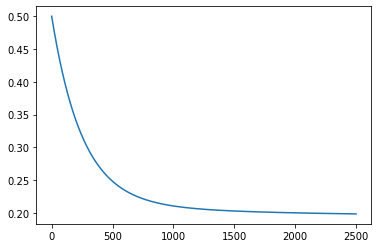

In [37]:
plt.plot(cost_history)

In [38]:
y_pred = X.dot(B)

In [39]:
y_pred[:10]

array([-0.5841769015954564, -0.08904726248934798, -0.10766417782755297,
       -0.19508140383220754, -0.9702712037923067, -0.5692167345667061,
       0.5820632182438075, -0.15934836324618795, -0.17198413389893147,
       -0.4560736459577185], dtype=object)

In [40]:
y[:10]

array([[-0.80748259],
       [-0.31349249],
       [-1.04627242],
       [-0.57885403],
       [-1.27937193],
       [-0.93449845],
       [-0.59917657],
       [-0.42643499],
       [-1.23933653],
       [-0.90503077]])

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
mse = mean_squared_error(y_pred, y.flatten())

In [43]:
np.sqrt(mse)

0.6301885877751922

In [48]:
-0.10766417782755297 * 98441.391015 + 211966.705440

201368.09401216934

In [49]:
-1.04627242 * 98441.391015 + 211966.705440

108970.19303456969